### Press Shift + Ctrl + Space to read the docstring

In [1]:
what_are_covered = {1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making predictions and evaluating a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}
what_are_covered

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
import numpy as np
import pandas as pd
from torch import nn # nn contains all of Pytorch building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

## Data (preparing and loading)

Data can be anything... in Machine learning

* Excel Spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of Two parts
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

In [3]:
## Data (preparing and loading)

weight = 0.7
bias = 0.3

X = torch.arange(0, 10, 0.02).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [4]:
len(X), len(y)

(500, 500)

### Splitting data into training and test sets (one of the most important concepts in machine learning)

If you're a University Student

* Course Materials (Trainig Set) ~ 60% - 80%
* Practice Exam (Validation Set) ~ 10% - 20%
* Final Exam (test Set) ~ 10% - 20%

In [5]:
#Creating Train and test data

train_len = int(0.8 * len(X))
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]
len(X_train), len(X_test), len(y_train), len(y_test)

(400, 100, 400, 100)

In [6]:
def plot_predictions(xtrain = X_train, ytrain = y_train, xtest = X_test, ytest = y_test, predictions = None):
  plt.figure(figsize=(5,3))
  plt.scatter(xtrain, ytrain, c= "b", s=4, label = "Training Data")
  plt.scatter(xtest, ytest, c= "g", s = 4, label = "Testing Data")
  if predictions is not None:
    plt.scatter(xtest, predictions, c = "r", s= 4, label = "Predictions")
  plt.legend(prop={"size":14})

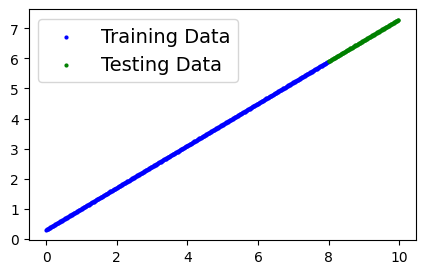

In [7]:
plot_predictions()

### Build Model

First Pytorch Model

What our model will do:

* start with random values (Weight and Bias)
* Look at tarining data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

1. Gradient Descent
2. Backpropagation

In [8]:
# Create Linear Regression Model Class

class LinearregressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
      def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- Start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True,  # <- Can this parameter be updated via gradient descent?
                                                dtype = torch.float)) # <- Pytorch loves the datatype torch.float32
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))


      # Forward method to define the computation in the model
      def forward(self, x: torch.tensor) -> torch.Tensor: # <- "x" is the input data, Any SubClass of nn.module needs to override forward() which defines forward computation of the model
        return self.weights * x + self.bias

### Pytorch Model Building Essentials


*   torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
*   torch.nn.parameter - what parameter should our model try and learn, often a pytorch layer from torch.nn will set these for us
*  torch.nn.Module - the base close for all neural network modules if you subclass if you should overwrite forward()
* torch.optim - this is where the optimizers in pytorch live, they will help with gradient descent.
* def forward() - Any module that inherits nn.module must override forward methos.
* torch.utils.data.Dataset - Represents a map between key (label) and sample (features) pairs of your data. Such as images and their associated labels.
* torch.utils.data.DataLoader - creates a python iterable over a torch Dataset (allows you to iterate over your data)





### Checking the contents of our PyTorch model

Now We've created a model. let'see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [9]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of our model (this is subclass of nn.Module)
model_0 = LinearregressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#List Named Parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias # <- Model Parameters should match these terms

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the forward() method.

In [12]:
with torch.inference_mode(): # <- In evaluation scripts where gradients are unnecessary we used Inference Modes, It disables gradient computation and other autograd-related features.
  y_preds = model_0(X_test)

y_preds

tensor([[2.8223],
        [2.8291],
        [2.8358],
        [2.8425],
        [2.8493],
        [2.8560],
        [2.8627],
        [2.8695],
        [2.8762],
        [2.8829],
        [2.8897],
        [2.8964],
        [2.9031],
        [2.9099],
        [2.9166],
        [2.9233],
        [2.9301],
        [2.9368],
        [2.9435],
        [2.9503],
        [2.9570],
        [2.9637],
        [2.9705],
        [2.9772],
        [2.9839],
        [2.9907],
        [2.9974],
        [3.0041],
        [3.0109],
        [3.0176],
        [3.0243],
        [3.0311],
        [3.0378],
        [3.0445],
        [3.0513],
        [3.0580],
        [3.0647],
        [3.0715],
        [3.0782],
        [3.0850],
        [3.0917],
        [3.0984],
        [3.1052],
        [3.1119],
        [3.1186],
        [3.1254],
        [3.1321],
        [3.1388],
        [3.1456],
        [3.1523],
        [3.1590],
        [3.1658],
        [3.1725],
        [3.1792],
        [3.1860],
        [3

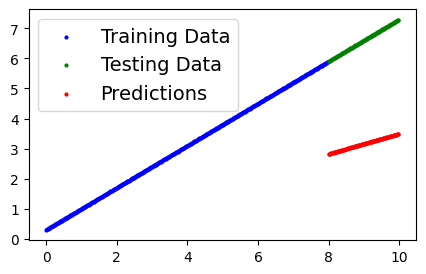

In [13]:
plot_predictions(predictions=y_preds)

### 3. Model

the whole idea of training is for a model to move from some unknown parameters.

In other wordsfrom a poor presentation of the data to a better representation of the data.

ONe way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss Function may also be called Cost Function or Criterion in different areas. For our case, we're going to referto it as a loss function.

* Loss Function - A function to measure how wrong your model's predictions are to the ideal outputs, Lower is better.
* Optimizer - Takes into account the loss of a model and adjust the model's parameters (e.g., Weight, bias) to improve the Loss Function.
    Inside the optimizer, we will often have to set two parameters().

    * params - the model parameters we would like to optimize, for example params = model_0.parameters()
    * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

And specifically for Pytorch, we need

* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Checkout our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a Loss Function
loss_fn = nn.L1Loss()

# Setup an Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.001) # lr -> possibly the most important Hyperparameter you can set

### Building a Training loop and Testing loop in Pytorch

A Couple of things we need in training loop

0. Loop through the data
1. Forward pass - this involves data moving through our model's `forward()` functions to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**BackPropagation**)
5. optimizer Step - use the optimizer to adjust our model's parameters to try and improve the Loss (**Gradient Descent**)


In [17]:
torch.manual_seed(42)
# An epoch is one loop through the data..
epochs = 500

#Setup empty Lists to keep track of model progress
epoch_count= []
train_loss_values = []
test_loss_values = []


## Training
# 0. Loop through the Data
for epoch in range(epochs):
  # Set the model to training mode - Pytorch model has different modes and the default is training mode.
  model_0.train() # train mode in pytorch sets all parameters that require gradients to true

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculte the Loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer Zero Grad
  optimizer.zero_grad() # If you don't zero out the gradients before calling loss.backward(), the new gradients will accumulate on top of the previous ones, leading to incorrect gradient values.

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5 step the optimizer (perform Gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): #with torch.no_grad() -> you may see torch.no_grad() in older Pytorch code
      #1. Do Forward Pass
      test_pred = model_0(X_test)

      #2. calculate the Loss
      test_loss = loss_fn(test_pred, y_test)

  epoch_count.append(epoch)
  train_loss_values.append(loss)
  test_loss_values.append(test_loss)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss} Model state dict: {model_0.state_dict()}")


Epoch: 0 | Loss: 1.6207962036132812 | Test_Loss: 3.4004745483398438 Model state dict: OrderedDict([('weights', tensor([0.3407])), ('bias', tensor([0.1298]))])
Epoch: 10 | Loss: 1.4515953063964844 | Test_Loss: 3.031773567199707 Model state dict: OrderedDict([('weights', tensor([0.3806])), ('bias', tensor([0.1398]))])
Epoch: 20 | Loss: 1.2823944091796875 | Test_Loss: 2.6630730628967285 Model state dict: OrderedDict([('weights', tensor([0.4205])), ('bias', tensor([0.1498]))])
Epoch: 30 | Loss: 1.1131936311721802 | Test_Loss: 2.29437255859375 Model state dict: OrderedDict([('weights', tensor([0.4604])), ('bias', tensor([0.1598]))])
Epoch: 40 | Loss: 0.9439928531646729 | Test_Loss: 1.9256722927093506 Model state dict: OrderedDict([('weights', tensor([0.5003])), ('bias', tensor([0.1698]))])
Epoch: 50 | Loss: 0.7747920155525208 | Test_Loss: 1.556971549987793 Model state dict: OrderedDict([('weights', tensor([0.5402])), ('bias', tensor([0.1798]))])
Epoch: 60 | Loss: 0.6055911779403687 | Test_L

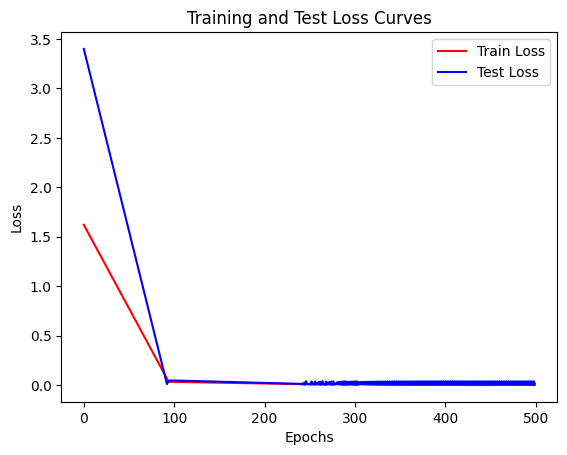

In [18]:
plt.plot(epoch_count, torch.tensor(train_loss_values).numpy(), c ='r', label = "Train Loss")
plt.plot(epoch_count, test_loss_values, c = 'b', label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7001])), ('bias', tensor([0.2990]))])

In [20]:
weight, bias

(0.7, 0.3)

In [21]:
with torch.inference_mode():
  ypreds_new = model_0(X_test)

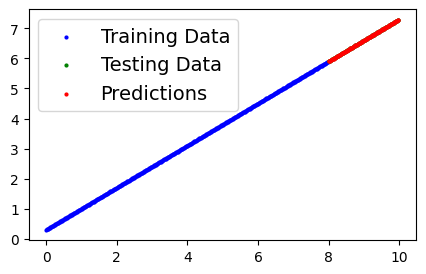

In [22]:
plot_predictions(predictions=ypreds_new)

###  Saving a Model in Pytorch

There are three main methods you have for saving and loading models in Pytorch.

1. torch.save() - allows you save a pytorch object in Python's pickle format
2. torch.load() - allows you load a saved Pytorch Object
3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7001])), ('bias', tensor([0.2990]))])

In [24]:
from pathlib import Path

#1. Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "Project_One_Neural_Networks.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

In [25]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr  8 20:53 Project_One_Neural_Networks.pth


### Loading a Pytorch Model

Since we saved our model's state_dict() rather than entire model, we'll create a new instance of our model class and load the saved state_dict() into that

In [26]:
# To load a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearregressionModel()

loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [27]:
# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7001])), ('bias', tensor([0.2990]))])

### Make some predictions with loaded model and compare with the original model predictions

In [29]:
loaded_model_0.eval()
model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(y_test)
  model_0_preds = model_0(y_test)

loaded_model_preds == model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

Putting it all Togeather

In [299]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

Create Device-Agnostic Code

this means if we've got access to GPU, our code will use it(for potentailly faster computing)

If no GPU is available, the code will default to using CPU

In [300]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Data

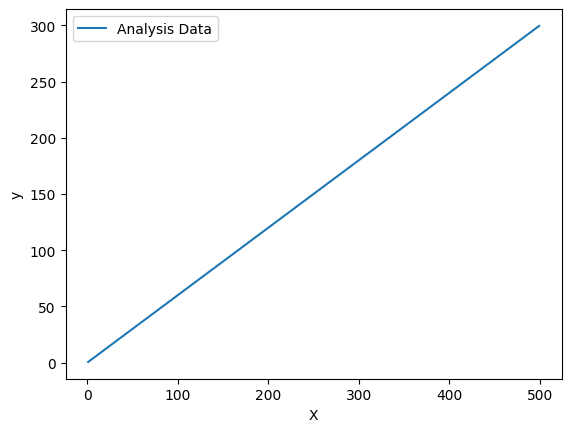

In [301]:
weight = 0.6
bias = 0.1

X = torch.arange(1, 500, 2, dtype=torch.float).unsqueeze(1)
y = weight * X + bias

plt.plot(X , y, label = "Analysis Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [302]:
len(X), 0.8 * len(X)

(250, 200.0)

In [303]:
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(200, 50, 200, 50)

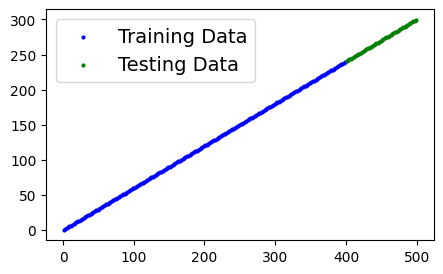

In [304]:
plot_predictions(X_train, y_train, X_test, y_test)

### Building a Linear Pytoch Model

In [305]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [306]:
torch.manual_seed(42)
model_v1 = LinearRegressionModelV1()
model_v1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [307]:
list(model_v1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [308]:
#Check Model Current Device
next(model_v1.parameters()).device

device(type='cpu')

In [309]:
#Set the Model to use the target device
model_v1.to(device)
next(model_v1.parameters()).device

device(type='cpu')

### Training

For training we need:

* Loss Function
* Optimizer
* Training loop
* Testing loop

In [310]:
# Setup Loss Function
lossfn = nn.L1Loss()

# Setup Optimizer
optimizerv1 = torch.optim.SGD(params= model_v1.parameters(), lr = 0.001)

In [311]:
torch.manual_seed(42)

epochs_count = []
training_loss_counts = []
test_loss_counts = []

epochs = 500
X_train,y_train,X_test, y_test = X_train.to(device),y_train.to(device),X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_v1.train()
  y_pred = model_v1(X_train)
  loss = lossfn(y_pred, y_train)
  optimizerv1.zero_grad()
  loss.backward()
  optimizerv1.step()

  model_v1.eval()
  with torch.inference_mode():
    y_test_pred = model_v1(X_test)
    loss_test = lossfn(y_test, y_test_pred)

  epochs_count.append(epoch)
  training_loss_counts.append(loss)
  test_loss_counts.append(loss_test)

  if epoch % 100 == 0 :
    print(f"Epoch: {epoch} | Loss: {loss} | state_dict: {model_v1.state_dict()}")


Epoch: 0 | Loss: 33.6377067565918 | state_dict: OrderedDict([('linear_layer.weight', tensor([[0.5645]])), ('linear_layer.bias', tensor([0.8290]))])


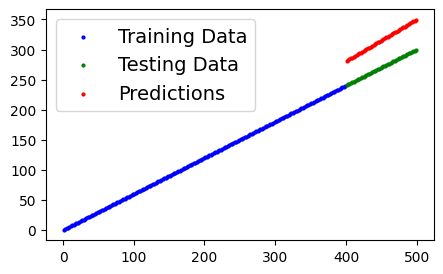

In [312]:
with torch.inference_mode():
  y_test_pred = model_v1(X_test)

plot_predictions(xtrain=X_train, ytrain=y_train, xtest=X_test, ytest=y_test,predictions= y_test_pred)

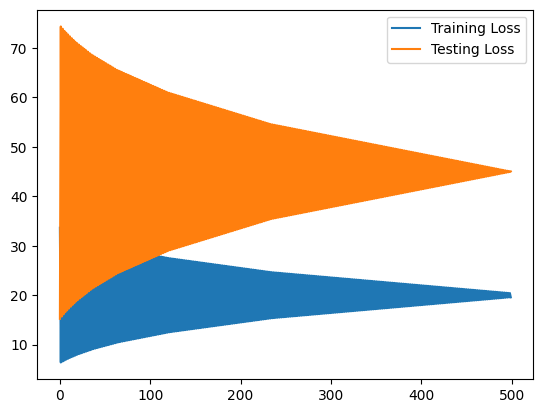

In [313]:
plt.plot(epochs_count, torch.tensor(training_loss_counts).numpy(), label = "Training Loss")
plt.plot(epochs_count, test_loss_counts, label = "Testing Loss")
plt.legend()
plt.show()